In [5]:
%matplotlib inline

from datetime import datetime
from StringIO import StringIO
from microquake.IMS import web_api
from dateutil.tz import tzlocal

## continuous data example

In [2]:
start_datetime = datetime(2017,12,12,12,43,15,tzinfo=tzlocal())
end_datetime = datetime(2017,12,12,12,43,45,tzinfo=tzlocal())
site_ids = [7, 8, 18, 19, 20, 21, 22, 23]
base_url = 'http://10.95.64.12:8002/ims-database-server/databases/mgl/'

In [3]:
st = web_api.get_continuous(base_url, start_datetime, end_datetime,
                            site_ids, format='binary-gz', network='OT')

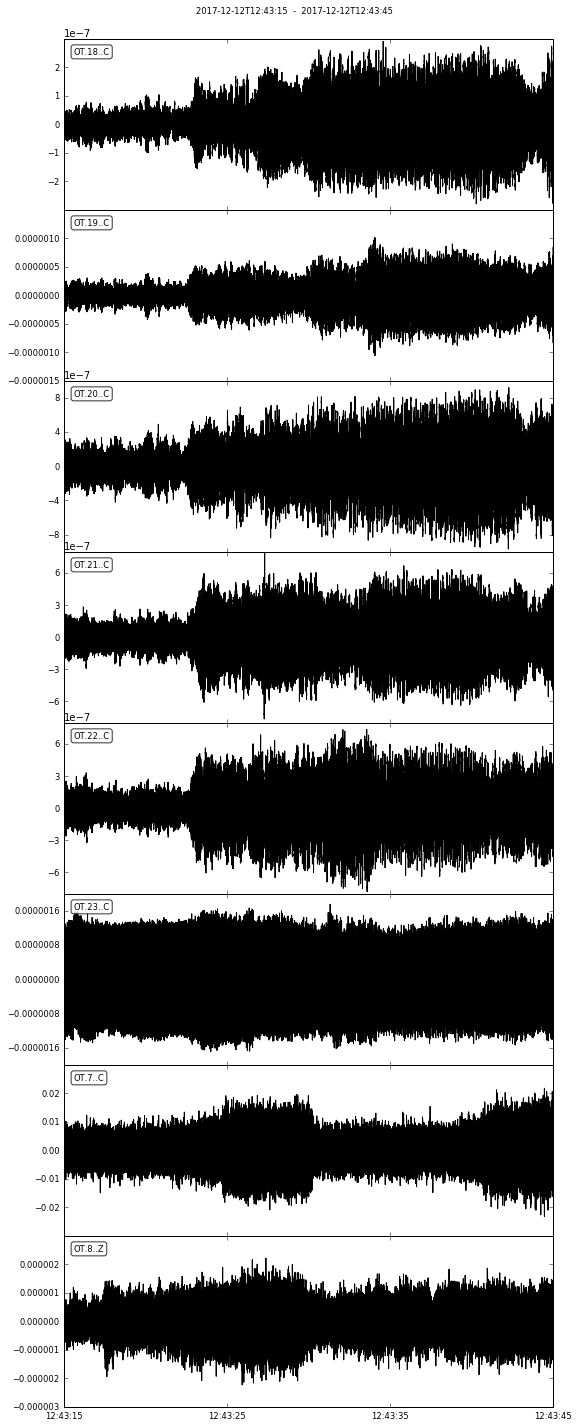

In [4]:
st.composite().plot()

## Triggered data example

In [6]:
from microquake.core.data.station import read_stations
from microquake.core import UTCDateTime

start_datetime = datetime(2017,12,11,0,0,0,tzinfo=tzlocal())
end_datetime = datetime(2017,12,12,12,0,0,tzinfo=tzlocal())

site = read_stations('sensors.csv')

In [7]:
starttime = UTCDateTime(start_datetime)
endtime = UTCDateTime(end_datetime)

cat = web_api.get_catalogue(base_url, starttime, endtime, site, blast=True,
                             event=False, accepted=True, manual=True)

UnboundLocalError: local variable 'csv_string' referenced before assignment

In [ ]:
# to get the seismograms associated to a particular event

event = cat[0]
seis = web_api.get_seismogram_event(base_url, event, site)

In [ ]:
cat.composite().plot()